In [1]:
import pandas_datareader as pdr
import pandas as pd
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint
import datetime
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact, interactive
from IPython.display import display
from itertools import chain, combinations
import sklearn as sk
import itertools
%matplotlib inline

In [2]:
url="https://raw.githubusercontent.com/dljaimes/Advanced-Methods-in-Data-Analysis_1_Grupo_5/main/dataTrain_carListings.csv"
data = pd.read_csv(url)
data.head()

,Price,Year,Mileage,State,Make,Model
0,21490,2014,31909,MD,Nissan,MuranoAWD
1,21250,2016,25741,KY,Chevrolet,CamaroCoupe
2,20925,2016,24633,SC,Hyundai,Santa
3,14500,2012,84026,OK,Jeep,Grand
4,32488,2013,22816,TN,Jeep,Wrangler


In [3]:
data.shape

(500000, 6)

In [4]:
data.Price.describe()

count    500000.000000
mean      21144.186304
std       10753.259704
min        5001.000000
25%       13499.000000
50%       18450.000000
75%       26998.000000
max       79999.000000
Name: Price, dtype: float64

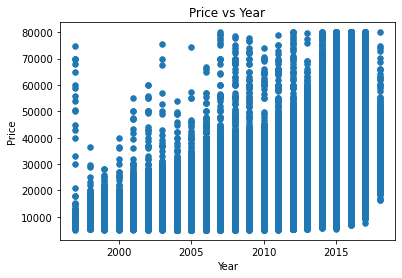

In [5]:
data.plot(kind='scatter', y='Price', x='Year', title="Price vs Year", s=30);

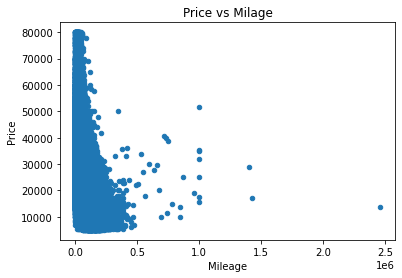

In [6]:
data.plot(kind='scatter', y='Price', x='Mileage', title="Price vs Milage");

In [10]:
data.columns

Index(['Price', 'Year', 'Mileage', 'State', 'Make', 'Model'], dtype='object')

In [11]:
XX=data.iloc[:,1:6]
y=data.iloc[:,0:1]


In [12]:
X=pd.get_dummies(XX, columns=['State', 'Make', 'Model'], prefix=["St", "Make", "Model"])

In [13]:
X.head()

,Year,Mileage,St_ AK,St_ AL,St_ AR,St_ AZ,St_ CA,St_ CO,St_ CT,St_ DC,...,Model_Yaris4dr,Model_YarisBase,Model_YarisLE,Model_Yukon,Model_Yukon2WD,Model_Yukon4WD,Model_Yukon4dr,Model_tC2dr,Model_xB5dr,Model_xD5dr
0,2014,31909,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2016,25741,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2016,24633,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012,84026,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2013,22816,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# ADABOOST

In [14]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

# Calibración de hiperparámetros

In [ ]:
param_grid_ad = {
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'n_estimators': range(50,250,50)
}
cv=10
model_ad = AdaBoostRegressor()
grid_search = GridSearchCV(estimator = model_ad, param_grid = param_grid_ad, 
                          cv = cv)
grid_search.fit(X, y)
learning_rate=grid_search.best_params_['learning_rate']
n_estimators=grid_search.best_params_['n_estimators']
print("Best: %f using %s" % (grid_search.best_params_))

C:\Users\esteb\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\esteb\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\esteb\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\esteb\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

# Modelo y desempeño en CV=10

In [ ]:
modelo_ad =AdaBoostRegressor(
                    n_estimators =n_estimators,
                    learning_rate=learning_rate
                 )
scores_ad = sk.model_selection.cross_val_score(
                    estimator = modelo_ad,
                    X         = X,
                    y         = y,
                    scoring   = 'neg_root_mean_squared_error',
                    cv        = 10
                 )
print(f"RMSE de modelo Adaboost calibrado: {-np.mean(scores_ad)}")

# Random Forest

In [33]:
from sklearn.ensemble import RandomForestRegressor

# Calibración de Hiperparámetros

In [34]:
param_grid_rf = {
    'max_depth': range(0,16,2),
    'max_features': range(2,X.shape[1]+1,1),
    'n_estimators':range(50,250,50)
}
rf = RandomForestRegressor()
grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid_rf, 
                          cv = cv, n_jobs = -1, verbose = 2)
grid_search_rf.fit(X, y)

max_depth=grid_search.best_params_['max_depth']
max_features=grid_search.best_params_['max_features']
n_estimators=grid_search.best_params_['n_estimators']
print("Best: %f using %s" % (grid_search_rf.best_params_))

Fitting 3 folds for each of 544 candidates, totalling 1632 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 353 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 636 tasks      | elapsed:   49.2s
[Parallel(n_jobs=-1)]: Done 1001 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1446 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1632 out of 1632 | elapsed:  2.0min finished


ValueError: could not convert string to float: ' MD'

# Modelo y desempeño en CV=10

In [ ]:
modelo_rf = RandomForestRegressor(
                    bootstrap= True,
                    n_estimators =n_estimators,
                    criterion    = 'mse',
                    max_depth    = max_depth,
                    max_features =max_features,
                    random_state = 123
                 )
scores_rf = sk.model_selection.cross_val_score(
                    estimator = modelo_rf,
                    X         = X,
                    y         = y.values.ravel(),
                    scoring   = 'neg_root_mean_squared_error',
                    cv        = 10
                 )
print(f"RMSE de modelo random forest calibrado: {-np.mean(scores_rf)}")

# XGBOOST

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Calibración de Hiperparámetros

In [ ]:
param_grid_gb= {
    "learning_rate":np.arange(0.1,0.6,0.1),
    'max_depth': range(3,16,2),
    'max_features': range(2,X.shape[1]+1,1),
    'n_estimators': range(50,250,50),
    "subsample": np.arange(0.6,1.2,0.2)
}

model_gb = GradientBoostingRegressor()
grid_search_gb = GridSearchCV(estimator = model_gb, param_grid = param_grid_gb, 
                          cv = cv, n_jobs = -1, verbose = 2)
grid_search_gb.fit(X, y)

learning_rate=grid_search_gb.best_params_['learning_rate']
n_estimators=grid_search_gb.best_params_['n_estimators']
max_depth=grid_search_gb.best_params_['max_depth']
max_features=grid_search_gb.best_params_['max_features']
subsample=grid_search_gb.best_params_['subsample']

print("Best: %f using %s" % (grid_search.best_params_))

# Modelo y desempeño en cv=10

In [ ]:
modelo_gb =  GradientBoostingRegressor(
                    learning_rate= learning_rate,
                    subsample= subsample_,
                    n_estimators =n_estimators_,
                    criterion    = 'mse',
                    max_depth    = max_depth_,
                    max_features =max_features_,
                    random_state = 123
                 )
scores_gb = sk.model_selection.cross_val_score(
                    estimator = modelo_gb,
                    X         = X,
                    y         = y,
                    scoring   = 'neg_root_mean_squared_error',
                    cv        = 10
                 )
print(f"RMSE de modelo XGBoost calibrado: {-np.mean(scores_gb)}")